In [2]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
import cv2
import mediapipe as mp
import os
import subprocess
import requests


# Filtering  Dataset

In [44]:
def plot_images(image_paths, titles):
    num_images = len(image_paths)
    
    if num_images != len(titles):
        print("Jumlah gambar tidak sesuai dengan jumlah judul.")
        return
    
    max_cols = 4
    num_rows = (num_images + max_cols - 1) // max_cols
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i in range(num_images):
        plt.subplot(num_rows, max_cols, i + 1)
        img = mpimg.imread(image_paths[i])
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

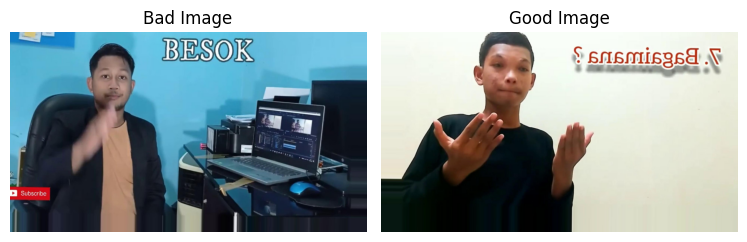

In [45]:
bad_img_path = "./sample/bad.jpg"
good_img_path = "./sample/good.jpg"

image_paths = [bad_img_path, good_img_path]
titles = ['Bad Image', 'Good Image']

plot_images(image_paths, titles)

c:\Users\whisn\anaconda3\envs\bangkitcourse\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


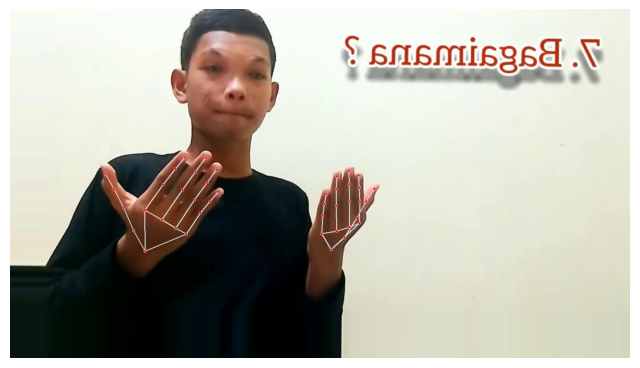

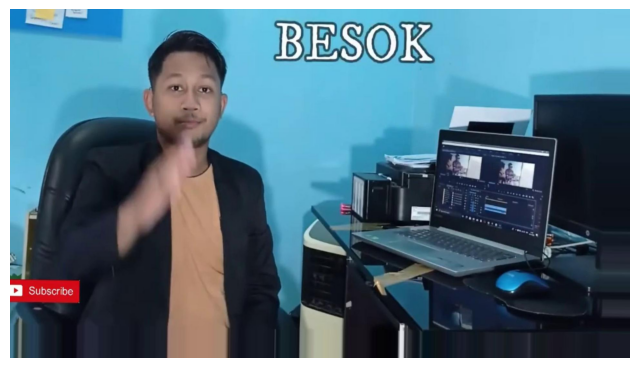

In [6]:
def detect_hand_landmarks(image_path):
    # Load model
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
    mp_drawing = mp.solutions.drawing_utils
    
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process image
    results = hands.process(image_rgb)
    
    # Draw landmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    
    # Convert image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show image with landmarks using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
# Contoh penggunaan
detect_hand_landmarks(good_img_path)
detect_hand_landmarks(bad_img_path)

In [25]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

hand_notfound_images = []
# For static images:
IMAGE_FILES = [good_img_path, bad_img_path]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5,
    # min_tracking_confidence=0.5,
    ) as hands:
  
  for idx, file in enumerate(IMAGE_FILES):
    filename = file.split('/')[-1].split('.')[0]
    print(filename)
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # print('Handedness:', results.multi_handedness)

    if not results.multi_hand_landmarks:
      hand_notfound_images.append(file)
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    
    # for hand_landmarks in results.multi_hand_landmarks:
    #   print('hand_landmarks:', hand_landmarks)
    #   print(
    #       f'Index finger tip coordinates: (',
    #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x},'
    #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y})'
    #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
    #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
    #   )
      
    #   mp_drawing.draw_landmarks(
    #       annotated_image,
    #       hand_landmarks,
    #       mp_hands.HAND_CONNECTIONS,
    #       mp_drawing_styles.get_default_hand_landmarks_style(),
    #       mp_drawing_styles.get_default_hand_connections_style())
    
    
    # cv2.imwrite('./tmp/annotated_' + filename + '.png', cv2.flip(annotated_image, 1))
    
    # Draw hand world landmarks.
    # if not results.multi_hand_world_landmarks:
    #   continue
    # for hand_world_landmarks in results.multi_hand_world_landmarks:
    #   mp_drawing.plot_landmarks(
    #     hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

good
hand_landmarks: landmark {
  x: 0.786013663
  y: 0.692296684
  z: 2.98202309e-007
}
landmark {
  x: 0.806336522
  y: 0.633103
  z: -0.0188981518
}
landmark {
  x: 0.818645358
  y: 0.567376792
  z: -0.0368238911
}
landmark {
  x: 0.832099617
  y: 0.509617388
  z: -0.0507522635
}
landmark {
  x: 0.844279766
  y: 0.465057641
  z: -0.0656388178
}
landmark {
  x: 0.780914903
  y: 0.576329708
  z: -0.0538187213
}
landmark {
  x: 0.752328575
  y: 0.499821365
  z: -0.0722088292
}
landmark {
  x: 0.735057116
  y: 0.457499057
  z: -0.0804633498
}
landmark {
  x: 0.720038295
  y: 0.423795402
  z: -0.0852253661
}
landmark {
  x: 0.754017532
  y: 0.602135539
  z: -0.0519516394
}
landmark {
  x: 0.720212
  y: 0.515538692
  z: -0.0686859041
}
landmark {
  x: 0.700995
  y: 0.464792609
  z: -0.0747609288
}
landmark {
  x: 0.684734404
  y: 0.427624226
  z: -0.0791275576
}
landmark {
  x: 0.731481254
  y: 0.62618053
  z: -0.0492162891
}
landmark {
  x: 0.700943768
  y: 0.547656298
  z: -0.0619659051

c:\Users\whisn\anaconda3\envs\bangkitcourse\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [29]:
def process_images(image_files):
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_hands = mp.solutions.hands

    hand_notfound_images = []

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5,
        # min_tracking_confidence=0.5,
    ) as hands:

        for idx, file in enumerate(image_files):
            filename = file.split('/')[-1].split('.')[0]
            print(filename)
            image = cv2.flip(cv2.imread(file), 1)
            # Convert the BGR image to RGB before processing.
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # print('Handedness:', results.multi_handedness)

            if not results.multi_hand_landmarks:
                hand_notfound_images.append(file)
                continue
            image_height, image_width, _ = image.shape
            annotated_image = image.copy()

            # for hand_landmarks in results.multi_hand_landmarks:
            #   print('hand_landmarks:', hand_landmarks)
            #   print(
            #       f'Index finger tip coordinates: (',
            #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
            #       f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            #   )
              
            #   mp_drawing.draw_landmarks(
            #       annotated_image,
            #       hand_landmarks,
            #       mp_hands.HAND_CONNECTIONS,
            #       mp_drawing_styles.get_default_hand_landmarks_style(),
            #       mp_drawing_styles.get_default_hand_connections_style())
            
            
            # cv2.imwrite('./tmp/annotated_' + filename + '.png', cv2.flip(annotated_image, 1))
            
            # Draw hand world landmarks.
            # if not results.multi_hand_world_landmarks:
            #   continue
            # for hand_world_landmarks in results.multi_hand_world_landmarks:
            #   mp_drawing.plot_landmarks(
            #     hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

    return hand_notfound_images


def list_images(directory):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory)
            for f in files
            if f.lower().endswith(('.jpg', '.png'))]

# Find Bad Image (Hand not Detected)

In [37]:
IMAGE_FILES = list_images('.\whisnu-augmented-dataset')
hands_notfound = process_images(IMAGE_FILES)
print(len(hands_notfound))

# Sample bad Image

In [47]:
print(hands_notfound[:5])

['.\\whisnu-augmented-dataset\\bagaimana\\aug-0_201_bagaimana_1.jpg', '.\\whisnu-augmented-dataset\\bagaimana\\aug-0_203_bagaimana_2.jpg', '.\\whisnu-augmented-dataset\\bagaimana\\aug-0_207_bagaimana_1.jpg', '.\\whisnu-augmented-dataset\\bagaimana\\aug-0_207_bagaimana_2.jpg', '.\\whisnu-augmented-dataset\\bagaimana\\aug-0_208_bagaimana_1.jpg']


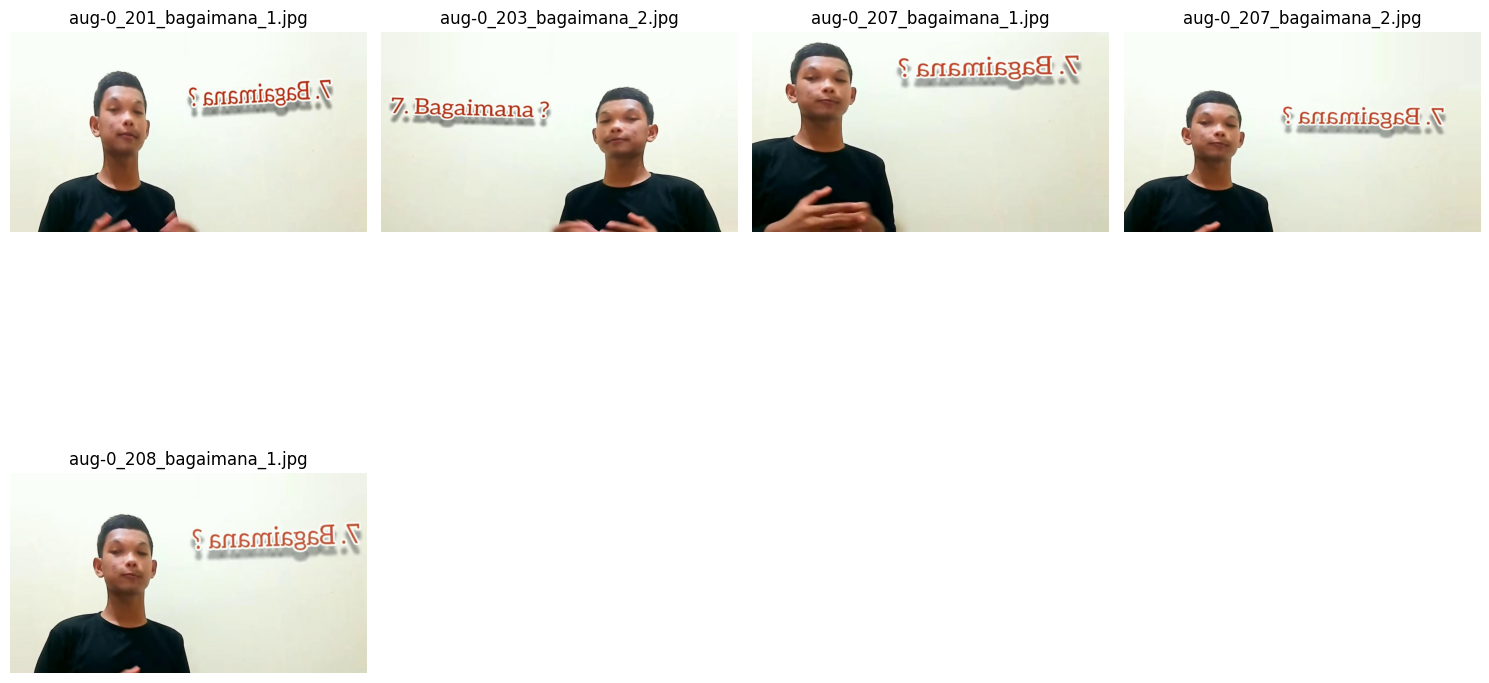

In [46]:
plot_images(hands_notfound[:5], [img.split('\\')[-1] for img in hands_notfound[:5]])

# Delete All Bad Image

In [48]:
def delete_images(image_paths):
    for image_path in image_paths:
        try:
            os.remove(image_path)
            print(f"File {image_path} berhasil dihapus.")
        except OSError as e:
            print(f"Error saat menghapus file {image_path}: {e.strerror}")
            
            
delete_images(hands_notfound)

File .\whisnu-augmented-dataset\bagaimana\aug-0_201_bagaimana_1.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_203_bagaimana_2.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_207_bagaimana_1.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_207_bagaimana_2.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_208_bagaimana_1.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_208_bagaimana_2.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_209_bagaimana_2.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_216_bagaimana_1.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_217_bagaimana_2.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_218_bagaimana_1.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_2_bagaimana_2.jpg berhasil dihapus.
File .\whisnu-augmented-dataset\bagaimana\aug-0_62_bagai

# Preview Hasil setelah Explore

In [50]:
def count_file(directory):
    file_count_per_class = {}
    total_files = 0

    for root, dirs, files in os.walk(directory):
        class_name = root.split(os.sep)[-1]
        count = sum(1 for file in files if file.endswith(".png") or file.endswith(".jpg"))
        
        if count > 0:
            file_count_per_class[class_name] = count
            total_files += count

    for class_name, count in file_count_per_class.items():
        print(f"{class_name}: {count}")

    print(f"Total Dataset: {total_files}")
    
count_file('whisnu-augmented-dataset')

bagaimana: 4700
besok: 4131
hari: 3612
jawab: 4050
kantor: 4977
kemarin: 4104
kerja: 4862
lusa: 3495
malam: 3609
nanti: 3476
pagi: 3807
sekarang: 3130
siang: 3540
sore: 3630
Total Dataset: 55123
